In [1815]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import csv

# Part I (50%)

## 1.1. Linear Regression

### 1.1.1. (5 marks)

In [2074]:
def change_basis_vector(vector,degree):
    if degree == 1:
        return np.ones(vector.shape)
    output = np.ones(vector.shape)
    if degree == 2:
        return np.append(output,vector,axis=1)
    output = np.append(output,vector,axis=1)
    for i in range(2,degree):
        output = np.append(output,vector**i,axis=1)
    return output

In [2081]:
class LinearRegressionMSE:
    def __init__(self):
        self.coef_ = []
    def fit(self,x,y):
        self.coef_ = np.longdouble((np.linalg.inv(x.T@x)@x.T)@y)
    def predict(self,x):
        return x@self.coef_
    def mse(self,pred,y):
        return np.sum((abs(pred-y)**2))/pred.shape[0]

In [2082]:
x = np.asarray([[1],[2],[3],[4]])
y = np.asarray([[3],[2],[0],[5]])

lin_reg_1 = LinearRegressionMSE()
lin_reg_1.fit(change_basis_vector(x,1),y)
pred_1 = lin_reg_1.predict(change_basis_vector(x,1))
mse_1 = lin_reg_1.mse(pred_1,y)

lin_reg_2 = LinearRegressionMSE()
lin_reg_2.fit(change_basis_vector(x,2),y)
pred_2 = lin_reg_2.predict(change_basis_vector(x,2))
mse_2 = lin_reg_2.mse(pred_2,y)

lin_reg_3 = LinearRegressionMSE()
lin_reg_3.fit(change_basis_vector(x,3),y)
pred_3 = lin_reg_3.predict(change_basis_vector(x,3))
mse_3 = lin_reg_3.mse(pred_3,y)

lin_reg_4 = LinearRegressionMSE()
lin_reg_4.fit(change_basis_vector(x,4),y)
pred_4 = lin_reg_4.predict(change_basis_vector(x,4))
mse_4 = lin_reg_4.mse(pred_4,y)

In [2083]:
def get_pol(x,model):
    output = 0
    for i in range(model.coef_.shape[0]):
        output += model.coef_[i]*x**i
    return output

def get_sk_pol(x,model):
    output = 0
    coeffs = model.coef_
    output += model.intercept_[0]
    for i in range(1,coeffs.shape[1]):
        output += coeffs[0][i]*x**i
    return output

### 1.1.1. a) Plot

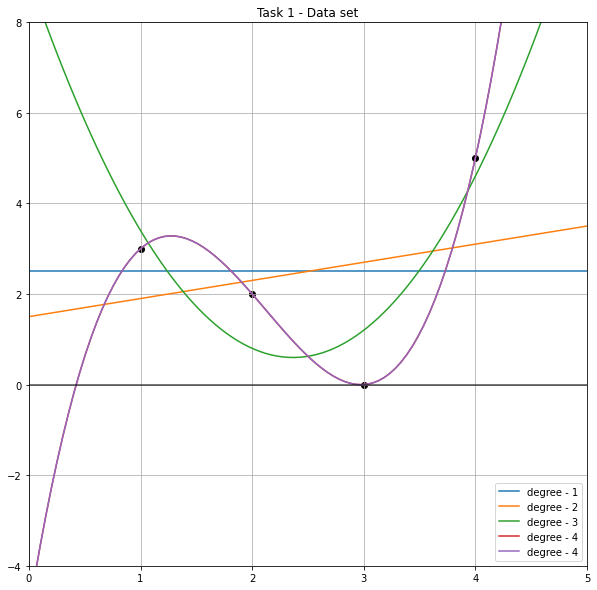

In [2084]:
x_axis = np.linspace(0,5,100)

plt.figure(figsize=[10,10])
plt.scatter(data_x,data_y,color="k")
plt.plot(x_axis,get_pol(x_axis,lin_reg_1),label="degree - 1")
plt.plot(x_axis,get_pol(x_axis,lin_reg_2),label="degree - 2")
plt.plot(x_axis,get_pol(x_axis,lin_reg_3),label="degree - 3")
plt.plot(x_axis,get_pol(x_axis,lin_reg_4),label="degree - 4")
plt.plot(x_axis,get_pol(x_axis,lin_reg_4),label="degree - 4")
plt.grid()
plt.xlim(0,5)
plt.ylim(-4,8)
plt.axhline(0,color='k',alpha=0.7)
plt.title("Task 1 - Data set")
plt.legend()
plt.show()

### 1.1.1. b) Equations for k = 1,2,3

for k = 1, y = 2.5 <br>
for k = 2, y = 1.5 + 0.4x <br>
for k = 3, y = 9 - 7.1x + 1.5x^2

### 1.1.1. c) MSE for k = 1,2,3,4

In [1782]:
print(f"Mean Square Errors for 1,2,3,4 degree polynomials (respectively): {mse_one},{mse_two},{mse_three},{mse_four}")

Mean Square Errors for 1,2,3,4 degree polynomials (respectively): 3.25,3.05,0.8000000000000008,1.39705877919448e-23


### 1.1.2. (10 marks)

### 1.1.2. a) Plot linear regression plots with different degrees (2,5,10,14,18)

In [2092]:
sample_x = np.random.random(30)

def func_x(x):
    return np.sin(2*np.pi*x)**2
func_x_vectorised = np.vectorize(func_x)

y = func_x_vectorised(sample_x)+np.random.normal(0,0.07,30)

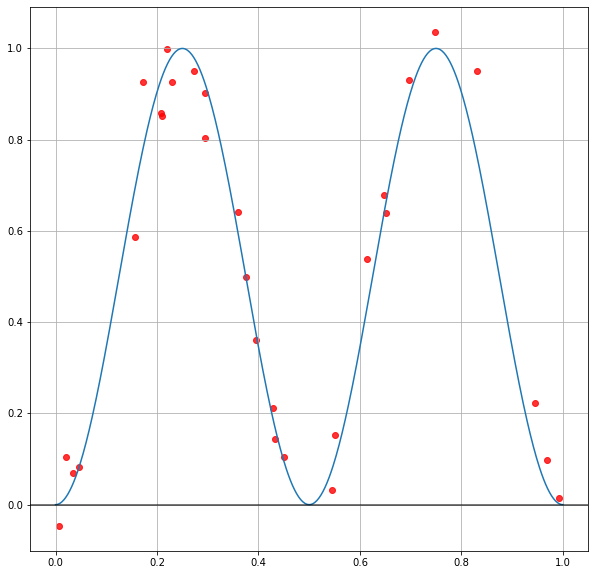

In [2093]:
x_axis = np.linspace(0,1,500)
plt.figure(figsize=[10,10])
plt.plot(x_axis,np.sin(2*np.pi*x_axis)**2)
plt.axhline(0,color="k",alpha=0.7)
plt.scatter(sample_x,y,color="r",alpha=0.8)
plt.grid()
plt.show()

In [2094]:
x = sample_x.reshape(-1,1)
y = y.reshape(-1,1)

lin_reg_2 = LinearRegressionMSE()
lin_reg_2.fit(change_basis_vector(x,2),y)
pred_2 = lin_reg_2.predict(change_basis_vector(x,2))
mse_2 = lin_reg_2.mse(pred_2,y)

lin_reg_5 = LinearRegressionMSE()
lin_reg_5.fit(change_basis_vector(x,5),y)
pred_5 = lin_reg_5.predict(change_basis_vector(x,5))
mse_5 = lin_reg_5.mse(pred_5,y)

lin_reg_10 = LinearRegressionMSE()
lin_reg_10.fit(change_basis_vector(x,10),y)
pred_10 = lin_reg_10.predict(change_basis_vector(x,10))
mse_10 = lin_reg_10.mse(pred_10,y)

lin_reg_14 = LinearRegressionMSE()
lin_reg_14.fit(change_basis_vector(x,14),y)
pred_14 = lin_reg_14.predict(change_basis_vector(x,14))
mse_14 = lin_reg_14.mse(pred_14,y)

lin_reg_18 = LinearRegressionMSE()
lin_reg_18.fit(change_basis_vector(x,18),y)
pred_18 = lin_reg_18.predict(change_basis_vector(x,18))
mse_18 = lin_reg_18.mse(pred_18,y)

In [2095]:
sk_reg_2 = LinearRegression()
sk_reg_2.fit(change_basis_vector(x,2),y)

sk_reg_5 = LinearRegression()
sk_reg_5.fit(change_basis_vector(x,5),y)

sk_reg_10 = LinearRegression()
sk_reg_10.fit(change_basis_vector(x,10),y)

sk_reg_14 = LinearRegression()
sk_reg_14.fit(change_basis_vector(x,14),y)

sk_reg_18 = LinearRegression()
sk_reg_18.fit(change_basis_vector(x,18),y)

LinearRegression()

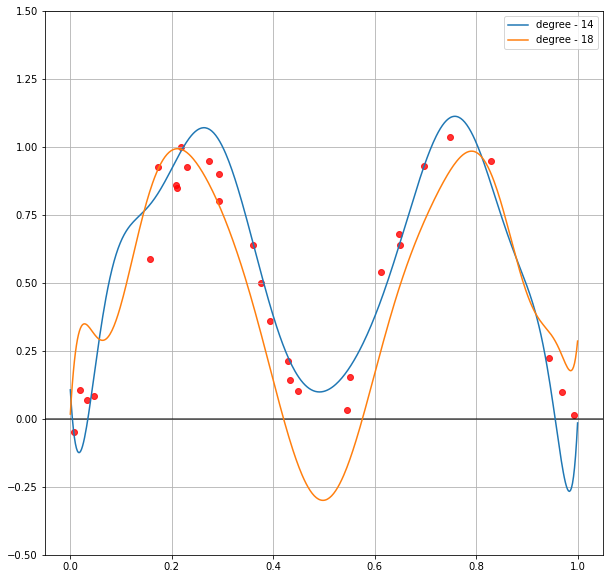

In [2096]:
plt.figure(figsize=[10,10])
plt.axhline(0,color="k",alpha=0.7)
plt.scatter(sample_x,y,color="r",alpha=0.8)
#plt.plot(x_axis,get_pol(x_axis,lin_reg_2),label="degree - 2")
#plt.plot(x_axis,get_pol(x_axis,lin_reg_5),label="degree - 5")
#plt.plot(x_axis,get_pol(x_axis,lin_reg_10),label="degree - 10")
plt.plot(x_axis,get_pol(x_axis,lin_reg_14),label="degree - 14")
plt.plot(x_axis,get_pol(x_axis,lin_reg_18),label="degree - 18")
plt.grid()
plt.ylim(-0.5,1.5)
plt.legend()
plt.show()

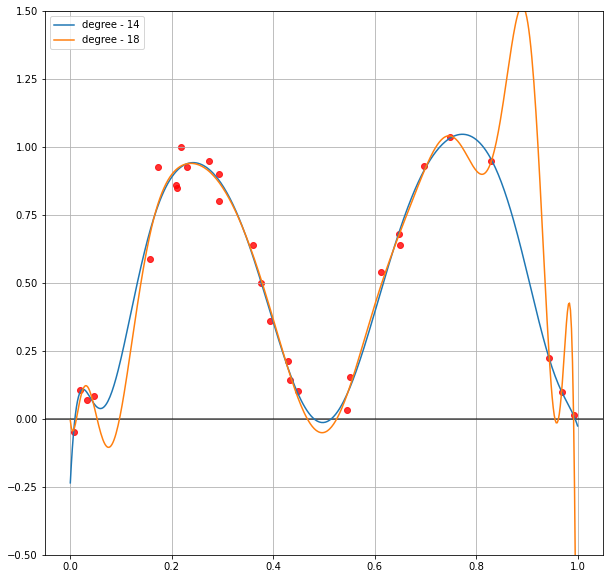

In [2097]:
plt.figure(figsize=[10,10])
plt.axhline(0,color="k",alpha=0.7)
plt.scatter(sample_x,y,color="r",alpha=0.8)
#plt.plot(x_axis,get_sk_pol(x_axis,sk_reg_2),label="degree - 2")
#plt.plot(x_axis,get_sk_pol(x_axis,sk_reg_5),label="degree - 5")
#plt.plot(x_axis,get_sk_pol(x_axis,sk_reg_10),label="degree - 10")
plt.plot(x_axis,get_sk_pol(x_axis,sk_reg_14),label="degree - 14")
plt.plot(x_axis,get_sk_pol(x_axis,sk_reg_18),label="degree - 18")
plt.grid()
plt.ylim(-0.5,1.5)
plt.legend()
plt.show()

### 1.1.2. b) Plot the natural log of the training error versus the polynomial dimension

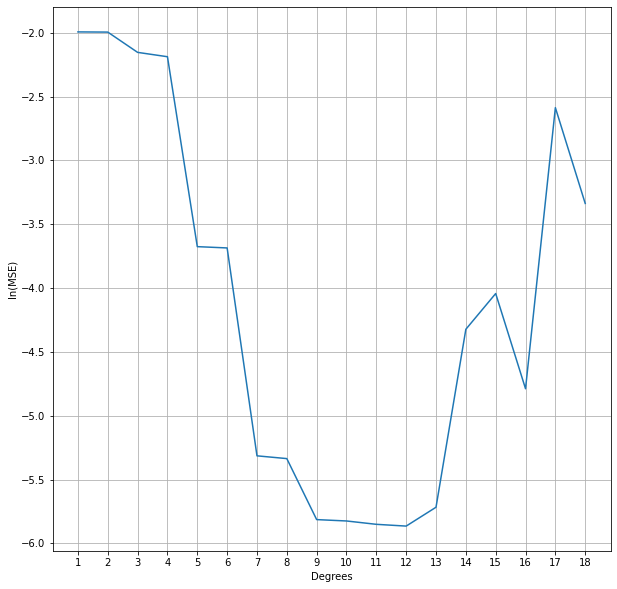

In [2098]:
lin_reg_1 = LinearRegressionMSE()
lin_reg_1.fit(change_basis_vector(x,1),y)
pred_1 = lin_reg_1.predict(change_basis_vector(x,1))
mse_1 = lin_reg_1.mse(pred_1,y)

lin_reg_3 = LinearRegressionMSE()
lin_reg_3.fit(change_basis_vector(x,3),y)
pred_3 = lin_reg_3.predict(change_basis_vector(x,3))
mse_3 = lin_reg_3.mse(pred_3,y)

lin_reg_4 = LinearRegressionMSE()
lin_reg_4.fit(change_basis_vector(x,4),y)
pred_4 = lin_reg_4.predict(change_basis_vector(x,4))
mse_4 = lin_reg_4.mse(pred_4,y)

lin_reg_6 = LinearRegressionMSE()
lin_reg_6.fit(change_basis_vector(x,6),y)
pred_6 = lin_reg_6.predict(change_basis_vector(x,6))
mse_6 = lin_reg_6.mse(pred_6,y)

lin_reg_7 = LinearRegressionMSE()
lin_reg_7.fit(change_basis_vector(x,7),y)
pred_7 = lin_reg_7.predict(change_basis_vector(x,7))
mse_7 = lin_reg_7.mse(pred_7,y)

lin_reg_8 = LinearRegressionMSE()
lin_reg_8.fit(change_basis_vector(x,8),y)
pred_8 = lin_reg_8.predict(change_basis_vector(x,8))
mse_8 = lin_reg_8.mse(pred_8,y)

lin_reg_9 = LinearRegressionMSE()
lin_reg_9.fit(change_basis_vector(x,9),y)
pred_9 = lin_reg_9.predict(change_basis_vector(x,9))
mse_9 = lin_reg_9.mse(pred_9,y)

lin_reg_11 = LinearRegressionMSE()
lin_reg_11.fit(change_basis_vector(x,11),y)
pred_11 = lin_reg_11.predict(change_basis_vector(x,11))
mse_11 = lin_reg_11.mse(pred_11,y)

lin_reg_12 = LinearRegressionMSE()
lin_reg_12.fit(change_basis_vector(x,12),y)
pred_12 = lin_reg_12.predict(change_basis_vector(x,12))
mse_12 = lin_reg_12.mse(pred_12,y)

lin_reg_13 = LinearRegressionMSE()
lin_reg_13.fit(change_basis_vector(x,13),y)
pred_13 = lin_reg_13.predict(change_basis_vector(x,13))
mse_13 = lin_reg_13.mse(pred_13,y)

lin_reg_15 = LinearRegressionMSE()
lin_reg_15.fit(change_basis_vector(x,15),y)
pred_15 = lin_reg_15.predict(change_basis_vector(x,15))
mse_15 = lin_reg_15.mse(pred_15,y)

lin_reg_16 = LinearRegressionMSE()
lin_reg_16.fit(change_basis_vector(x,16),y)
pred_16 = lin_reg_16.predict(change_basis_vector(x,16))
mse_16 = lin_reg_16.mse(pred_16,y)

lin_reg_17 = LinearRegressionMSE()
lin_reg_17.fit(change_basis_vector(x,17),y)
pred_17 = lin_reg_17.predict(change_basis_vector(x,17))
mse_17 = lin_reg_17.mse(pred_17,y)

train_mses = [mse_1,mse_2,mse_3,mse_4,mse_5,mse_6,mse_7,mse_8,mse_9,mse_10,mse_11,mse_12,mse_13,mse_14,mse_15,mse_16,mse_17,mse_18]
ln_mses = [np.log(mse) for mse in train_mses]
degrees = np.arange(1,19,1)
plt.figure(figsize=[10,10])
plt.plot(degrees,ln_mses)
plt.ylabel("ln(MSE)")
plt.xlabel("Degrees")
plt.xticks(np.arange(1,19,1))
plt.grid()
plt.show()

### 1.1.2. c) Test set 

In [1790]:
test_x = np.random.random(1000)
test_y = func_x_vectorised(test_x)+np.random.normal(0,0.07,1000)

test_x = test_x.reshape(-1,1)
test_y = test_y.reshape(-1,1)

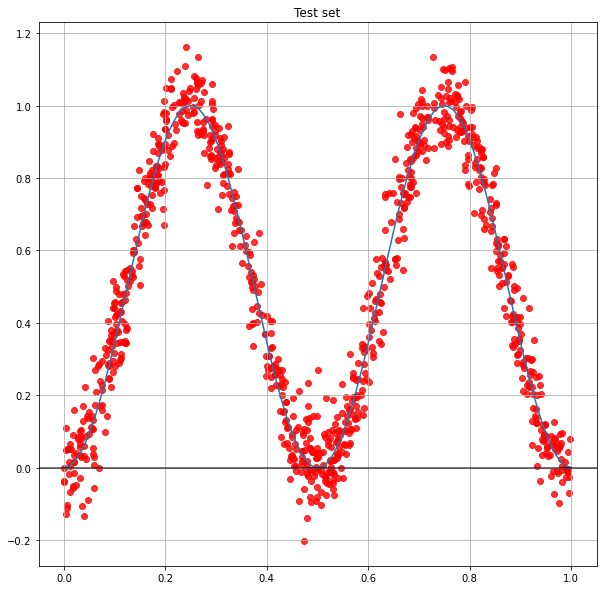

In [1791]:
x_axis = np.linspace(0,1,500)
plt.figure(figsize=[10,10])
plt.plot(x_axis,np.sin(2*np.pi*x_axis)**2)
plt.axhline(0,color="k",alpha=0.7)
plt.scatter(test_x,test_y,color="r",alpha=0.8)
plt.title("Test set")
plt.grid()
plt.show()

In [1792]:
test_mse_1 = lin_reg_1.mse(lin_reg_1.predict(change_basis_vector(test_x,1)),test_y)
test_mse_2 = lin_reg_2.mse(lin_reg_2.predict(change_basis_vector(test_x,2)),test_y)
test_mse_3 = lin_reg_3.mse(lin_reg_3.predict(change_basis_vector(test_x,3)),test_y)
test_mse_4 = lin_reg_4.mse(lin_reg_4.predict(change_basis_vector(test_x,4)),test_y)
test_mse_5 = lin_reg_5.mse(lin_reg_5.predict(change_basis_vector(test_x,5)),test_y)
test_mse_6 = lin_reg_6.mse(lin_reg_6.predict(change_basis_vector(test_x,6)),test_y)
test_mse_7 = lin_reg_7.mse(lin_reg_7.predict(change_basis_vector(test_x,7)),test_y)
test_mse_8 = lin_reg_8.mse(lin_reg_8.predict(change_basis_vector(test_x,8)),test_y)
test_mse_9 = lin_reg_9.mse(lin_reg_9.predict(change_basis_vector(test_x,9)),test_y)
test_mse_10 = lin_reg_10.mse(lin_reg_10.predict(change_basis_vector(test_x,10)),test_y)
test_mse_11 = lin_reg_11.mse(lin_reg_11.predict(change_basis_vector(test_x,11)),test_y)
test_mse_12 = lin_reg_12.mse(lin_reg_12.predict(change_basis_vector(test_x,12)),test_y)
test_mse_13 = lin_reg_13.mse(lin_reg_13.predict(change_basis_vector(test_x,13)),test_y)
test_mse_14 = lin_reg_14.mse(lin_reg_14.predict(change_basis_vector(test_x,14)),test_y)
test_mse_15 = lin_reg_15.mse(lin_reg_15.predict(change_basis_vector(test_x,15)),test_y)
test_mse_16 = lin_reg_16.mse(lin_reg_16.predict(change_basis_vector(test_x,16)),test_y)
test_mse_17 = lin_reg_17.mse(lin_reg_17.predict(change_basis_vector(test_x,17)),test_y)
test_mse_18 = lin_reg_18.mse(lin_reg_18.predict(change_basis_vector(test_x,18)),test_y)

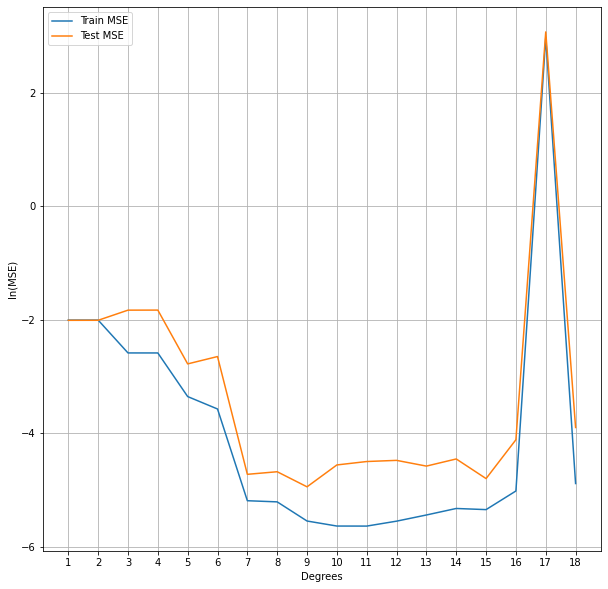

In [1793]:
test_mses = [test_mse_1,test_mse_2,test_mse_3,test_mse_4,test_mse_5,test_mse_6,test_mse_7,test_mse_8,test_mse_9,test_mse_10,test_mse_11,test_mse_12,test_mse_13,test_mse_14,test_mse_15,test_mse_16,test_mse_17,test_mse_18]
ln_mses_test = [np.log(mse) for mse in test_mses]
degrees = np.arange(1,19,1)
plt.figure(figsize=[10,10])
plt.plot(degrees,ln_mses,label="Train MSE")
plt.plot(degrees,ln_mses_test,label="Test MSE")
plt.ylabel("ln(MSE)")
plt.xlabel("Degrees")
plt.xticks(np.arange(1,19,1))
plt.grid()
plt.legend()
plt.show()

### 1.1.2. d) Repeat for 100 iterations and plot the average ln(MSE) for training and testing

In [1794]:
def train_and_test(iters):
    avgs_ln_train = np.zeros(18)
    avgs_ln_test = np.zeros(18)
    for iter in range(iters):

        sample_x = np.random.random(30)
        def func_x(x):
            return np.sin(2*np.pi*x)**2
        func_x_vectorised = np.vectorize(func_x)
        y = func_x_vectorised(sample_x)+np.random.normal(0,0.07,30)

        x = sample_x.reshape(-1,1)
        y = y.reshape(-1,1)

        lin_reg_2 = LinearRegressionMSE()
        lin_reg_2.fit(change_basis_vector(x,2),y)
        pred_2 = lin_reg_2.predict(change_basis_vector(x,2))
        mse_2 = lin_reg_2.mse(pred_2,y)

        lin_reg_5 = LinearRegressionMSE()
        lin_reg_5.fit(change_basis_vector(x,5),y)
        pred_5 = lin_reg_5.predict(change_basis_vector(x,5))
        mse_5 = lin_reg_5.mse(pred_5,y)

        lin_reg_10 = LinearRegressionMSE()
        lin_reg_10.fit(change_basis_vector(x,10),y)
        pred_10 = lin_reg_10.predict(change_basis_vector(x,10))
        mse_10 = lin_reg_10.mse(pred_10,y)

        lin_reg_14 = LinearRegressionMSE()
        lin_reg_14.fit(change_basis_vector(x,14),y)
        pred_14 = lin_reg_14.predict(change_basis_vector(x,14))
        mse_14 = lin_reg_14.mse(pred_14,y)

        lin_reg_18 = LinearRegressionMSE()
        lin_reg_18.fit(change_basis_vector(x,18),y)
        pred_18 = lin_reg_18.predict(change_basis_vector(x,18))
        mse_18 = lin_reg_18.mse(pred_18,y)

        lin_reg_1 = LinearRegressionMSE()
        lin_reg_1.fit(change_basis_vector(x,1),y)
        pred_1 = lin_reg_1.predict(change_basis_vector(x,1))
        mse_1 = lin_reg_1.mse(pred_1,y)

        lin_reg_3 = LinearRegressionMSE()
        lin_reg_3.fit(change_basis_vector(x,3),y)
        pred_3 = lin_reg_3.predict(change_basis_vector(x,3))
        mse_3 = lin_reg_3.mse(pred_3,y)

        lin_reg_4 = LinearRegressionMSE()
        lin_reg_4.fit(change_basis_vector(x,4),y)
        pred_4 = lin_reg_4.predict(change_basis_vector(x,4))
        mse_4 = lin_reg_4.mse(pred_4,y)

        lin_reg_6 = LinearRegressionMSE()
        lin_reg_6.fit(change_basis_vector(x,6),y)
        pred_6 = lin_reg_6.predict(change_basis_vector(x,6))
        mse_6 = lin_reg_6.mse(pred_6,y)

        lin_reg_7 = LinearRegressionMSE()
        lin_reg_7.fit(change_basis_vector(x,7),y)
        pred_7 = lin_reg_7.predict(change_basis_vector(x,7))
        mse_7 = lin_reg_7.mse(pred_7,y)

        lin_reg_8 = LinearRegressionMSE()
        lin_reg_8.fit(change_basis_vector(x,8),y)
        pred_8 = lin_reg_8.predict(change_basis_vector(x,8))
        mse_8 = lin_reg_8.mse(pred_8,y)

        lin_reg_9 = LinearRegressionMSE()
        lin_reg_9.fit(change_basis_vector(x,9),y)
        pred_9 = lin_reg_9.predict(change_basis_vector(x,9))
        mse_9 = lin_reg_9.mse(pred_9,y)

        lin_reg_11 = LinearRegressionMSE()
        lin_reg_11.fit(change_basis_vector(x,11),y)
        pred_11 = lin_reg_11.predict(change_basis_vector(x,11))
        mse_11 = lin_reg_11.mse(pred_11,y)

        lin_reg_12 = LinearRegressionMSE()
        lin_reg_12.fit(change_basis_vector(x,12),y)
        pred_12 = lin_reg_12.predict(change_basis_vector(x,12))
        mse_12 = lin_reg_12.mse(pred_12,y)

        lin_reg_13 = LinearRegressionMSE()
        lin_reg_13.fit(change_basis_vector(x,13),y)
        pred_13 = lin_reg_13.predict(change_basis_vector(x,13))
        mse_13 = lin_reg_13.mse(pred_13,y)

        lin_reg_15 = LinearRegressionMSE()
        lin_reg_15.fit(change_basis_vector(x,15),y)
        pred_15 = lin_reg_15.predict(change_basis_vector(x,15))
        mse_15 = lin_reg_15.mse(pred_15,y)

        lin_reg_16 = LinearRegressionMSE()
        lin_reg_16.fit(change_basis_vector(x,16),y)
        pred_16 = lin_reg_16.predict(change_basis_vector(x,16))
        mse_16 = lin_reg_16.mse(pred_16,y)

        lin_reg_17 = LinearRegressionMSE()
        lin_reg_17.fit(change_basis_vector(x,17),y)
        pred_17 = lin_reg_17.predict(change_basis_vector(x,17))
        mse_17 = lin_reg_17.mse(pred_17,y)

        test_x = np.random.random(1000)
        test_y = func_x_vectorised(test_x)+np.random.normal(0,0.07,1000)

        test_x = test_x.reshape(-1,1)
        test_y = test_y.reshape(-1,1)
        
        test_mse_1 = lin_reg_1.mse(lin_reg_1.predict(change_basis_vector(test_x,1)),test_y)
        test_mse_2 = lin_reg_2.mse(lin_reg_2.predict(change_basis_vector(test_x,2)),test_y)
        test_mse_3 = lin_reg_3.mse(lin_reg_3.predict(change_basis_vector(test_x,3)),test_y)
        test_mse_4 = lin_reg_4.mse(lin_reg_4.predict(change_basis_vector(test_x,4)),test_y)
        test_mse_5 = lin_reg_5.mse(lin_reg_5.predict(change_basis_vector(test_x,5)),test_y)
        test_mse_6 = lin_reg_6.mse(lin_reg_6.predict(change_basis_vector(test_x,6)),test_y)
        test_mse_7 = lin_reg_7.mse(lin_reg_7.predict(change_basis_vector(test_x,7)),test_y)
        test_mse_8 = lin_reg_8.mse(lin_reg_8.predict(change_basis_vector(test_x,8)),test_y)
        test_mse_9 = lin_reg_9.mse(lin_reg_9.predict(change_basis_vector(test_x,9)),test_y)
        test_mse_10 = lin_reg_10.mse(lin_reg_10.predict(change_basis_vector(test_x,10)),test_y)
        test_mse_11 = lin_reg_11.mse(lin_reg_11.predict(change_basis_vector(test_x,11)),test_y)
        test_mse_12 = lin_reg_12.mse(lin_reg_12.predict(change_basis_vector(test_x,12)),test_y)
        test_mse_13 = lin_reg_13.mse(lin_reg_13.predict(change_basis_vector(test_x,13)),test_y)
        test_mse_14 = lin_reg_14.mse(lin_reg_14.predict(change_basis_vector(test_x,14)),test_y)
        test_mse_15 = lin_reg_15.mse(lin_reg_15.predict(change_basis_vector(test_x,15)),test_y)
        test_mse_16 = lin_reg_16.mse(lin_reg_16.predict(change_basis_vector(test_x,16)),test_y)
        test_mse_17 = lin_reg_17.mse(lin_reg_17.predict(change_basis_vector(test_x,17)),test_y)
        test_mse_18 = lin_reg_18.mse(lin_reg_18.predict(change_basis_vector(test_x,18)),test_y)

        train_mses = [mse_1,mse_2,mse_3,mse_4,mse_5,mse_6,mse_7,mse_8,mse_9,mse_10,mse_11,mse_12,mse_13,mse_14,mse_15,mse_16,mse_17,mse_18]
        ln_mses =  np.asarray([np.log(mse) for mse in train_mses])
        test_mses = [test_mse_1,test_mse_2,test_mse_3,test_mse_4,test_mse_5,test_mse_6,test_mse_7,test_mse_8,test_mse_9,test_mse_10,test_mse_11,test_mse_12,test_mse_13,test_mse_14,test_mse_15,test_mse_16,        test_mse_17,test_mse_18]
        ln_mses_test = np.asarray([np.log(mse) for mse in test_mses])

        avgs_ln_train += ln_mses 
        avgs_ln_test += ln_mses_test

    return avgs_ln_train/iter,avgs_ln_test/iter

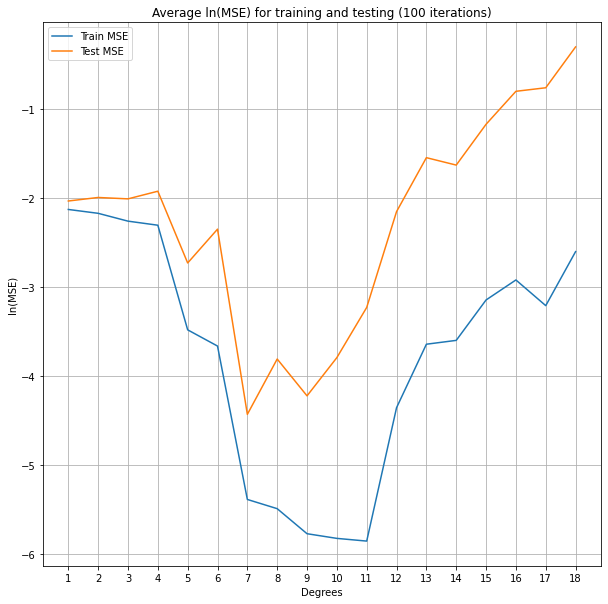

In [1795]:
avgs_ln_train, avgs_ln_test = train_and_test(100)
degrees = np.arange(1,19,1)
plt.figure(figsize=[10,10])
plt.plot(degrees,avgs_ln_train,label="Train MSE")
plt.plot(degrees,avgs_ln_test,label="Test MSE")
plt.ylabel("ln(MSE)")
plt.xlabel("Degrees")
plt.xticks(np.arange(1,19,1))
plt.title("Average ln(MSE) for training and testing (100 iterations)")
plt.grid()
plt.legend()
plt.show()

### 1.1.3. Sine basis

In [2099]:
sample_x = np.random.random(30)
def func_x(x):
    return np.sin(2*np.pi*x)**2
func_x_vectorised = np.vectorize(func_x)
y = func_x_vectorised(sample_x)+np.random.normal(0,0.07,30)

In [2100]:
x = sample_x.reshape(-1,1)
y = y.reshape(-1,1)

In [2101]:
def change_basis_vector_sine(vector,degree):
    if degree == 1:
        return np.sin(np.pi*vector)
    output = np.sin(np.pi*vector)
    for i in range(2,degree+1):
        output = np.append(output,np.sin(i*np.pi*vector),axis=1)
    return output

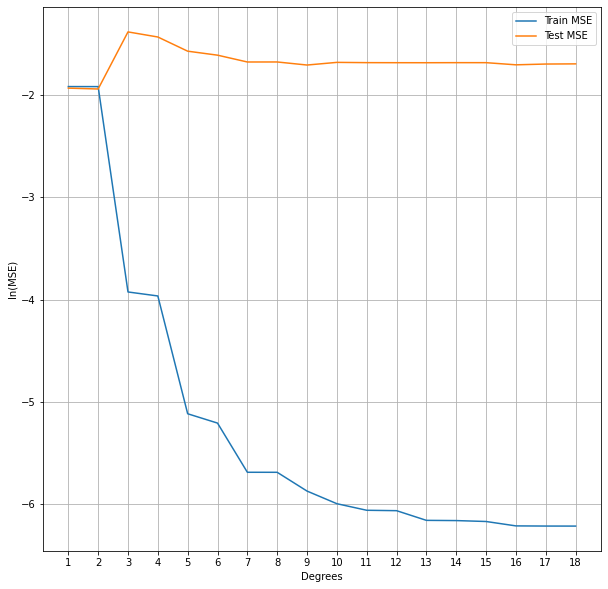

In [2107]:
lin_reg_1 = LinearRegressionMSE()
lin_reg_1.fit(change_basis_vector_sine(x,1),y)
pred_1 = lin_reg_1.predict(change_basis_vector_sine(x,1))
mse_1 = lin_reg_1.mse(pred_1,y)

lin_reg_2 = LinearRegressionMSE()
lin_reg_2.fit(change_basis_vector_sine(x,2),y)
pred_2 = lin_reg_2.predict(change_basis_vector_sine(x,2))
mse_2 = lin_reg_2.mse(pred_2,y)

lin_reg_3 = LinearRegressionMSE()
lin_reg_3.fit(change_basis_vector_sine(x,3),y)
pred_3 = lin_reg_3.predict(change_basis_vector_sine(x,3))
mse_3 = lin_reg_3.mse(pred_3,y)

lin_reg_4 = LinearRegressionMSE()
lin_reg_4.fit(change_basis_vector_sine(x,4),y)
pred_4 = lin_reg_4.predict(change_basis_vector_sine(x,4))
mse_4 = lin_reg_4.mse(pred_4,y)

lin_reg_5 = LinearRegressionMSE()
lin_reg_5.fit(change_basis_vector_sine(x,5),y)
pred_5 = lin_reg_5.predict(change_basis_vector_sine(x,5))
mse_5 = lin_reg_5.mse(pred_5,y)

lin_reg_6 = LinearRegressionMSE()
lin_reg_6.fit(change_basis_vector_sine(x,6),y)
pred_6 = lin_reg_6.predict(change_basis_vector_sine(x,6))
mse_6 = lin_reg_6.mse(pred_6,y)

lin_reg_7 = LinearRegressionMSE()
lin_reg_7.fit(change_basis_vector_sine(x,7),y)
pred_7 = lin_reg_7.predict(change_basis_vector_sine(x,7))
mse_7 = lin_reg_7.mse(pred_7,y)

lin_reg_8 = LinearRegressionMSE()
lin_reg_8.fit(change_basis_vector_sine(x,8),y)
pred_8 = lin_reg_8.predict(change_basis_vector_sine(x,8))
mse_8 = lin_reg_8.mse(pred_8,y)

lin_reg_9 = LinearRegressionMSE()
lin_reg_9.fit(change_basis_vector_sine(x,9),y)
pred_9 = lin_reg_9.predict(change_basis_vector_sine(x,9))
mse_9 = lin_reg_9.mse(pred_9,y)

lin_reg_10 = LinearRegressionMSE()
lin_reg_10.fit(change_basis_vector_sine(x,10),y)
pred_10 = lin_reg_10.predict(change_basis_vector_sine(x,10))
mse_10 = lin_reg_10.mse(pred_10,y)

lin_reg_11 = LinearRegressionMSE()
lin_reg_11.fit(change_basis_vector_sine(x,11),y)
pred_11 = lin_reg_11.predict(change_basis_vector_sine(x,11))
mse_11 = lin_reg_11.mse(pred_11,y)

lin_reg_12 = LinearRegressionMSE()
lin_reg_12.fit(change_basis_vector_sine(x,12),y)
pred_12 = lin_reg_12.predict(change_basis_vector_sine(x,12))
mse_12 = lin_reg_12.mse(pred_12,y)

lin_reg_13 = LinearRegressionMSE()
lin_reg_13.fit(change_basis_vector_sine(x,13),y)
pred_13 = lin_reg_13.predict(change_basis_vector_sine(x,13))
mse_13 = lin_reg_13.mse(pred_13,y)

lin_reg_14 = LinearRegressionMSE()
lin_reg_14.fit(change_basis_vector_sine(x,14),y)
pred_14 = lin_reg_14.predict(change_basis_vector_sine(x,14))
mse_14 = lin_reg_14.mse(pred_14,y)

lin_reg_15 = LinearRegressionMSE()
lin_reg_15.fit(change_basis_vector_sine(x,15),y)
pred_15 = lin_reg_15.predict(change_basis_vector_sine(x,15))
mse_15 = lin_reg_15.mse(pred_15,y)

lin_reg_16 = LinearRegressionMSE()
lin_reg_16.fit(change_basis_vector_sine(x,16),y)
pred_16 = lin_reg_16.predict(change_basis_vector_sine(x,16))
mse_16 = lin_reg_16.mse(pred_16,y)

lin_reg_17 = LinearRegressionMSE()
lin_reg_17.fit(change_basis_vector_sine(x,17),y)
pred_17 = lin_reg_17.predict(change_basis_vector_sine(x,17))
mse_17 = lin_reg_17.mse(pred_17,y)

lin_reg_18 = LinearRegressionMSE()
lin_reg_18.fit(change_basis_vector_sine(x,18),y)
pred_18 = lin_reg_18.predict(change_basis_vector_sine(x,18))
mse_18 = lin_reg_18.mse(pred_18,y)

test_x = np.random.random(1000)
test_y = func_x_vectorised(test_x)+np.random.normal(0,0.07,1000)

test_x = test_x.reshape(-1,1)
test_y = test_y.reshape(-1,1)

test_mse_1 = lin_reg_1.mse(lin_reg_1.predict(change_basis_vector(test_x,1)),test_y)
test_mse_2 = lin_reg_2.mse(lin_reg_2.predict(change_basis_vector(test_x,2)),test_y)
test_mse_3 = lin_reg_3.mse(lin_reg_3.predict(change_basis_vector(test_x,3)),test_y)
test_mse_4 = lin_reg_4.mse(lin_reg_4.predict(change_basis_vector(test_x,4)),test_y)
test_mse_5 = lin_reg_5.mse(lin_reg_5.predict(change_basis_vector(test_x,5)),test_y)
test_mse_6 = lin_reg_6.mse(lin_reg_6.predict(change_basis_vector(test_x,6)),test_y)
test_mse_7 = lin_reg_7.mse(lin_reg_7.predict(change_basis_vector(test_x,7)),test_y)
test_mse_8 = lin_reg_8.mse(lin_reg_8.predict(change_basis_vector(test_x,8)),test_y)
test_mse_9 = lin_reg_9.mse(lin_reg_9.predict(change_basis_vector(test_x,9)),test_y)
test_mse_10 = lin_reg_10.mse(lin_reg_10.predict(change_basis_vector(test_x,10)),test_y)
test_mse_11 = lin_reg_11.mse(lin_reg_11.predict(change_basis_vector(test_x,11)),test_y)
test_mse_12 = lin_reg_12.mse(lin_reg_12.predict(change_basis_vector(test_x,12)),test_y)
test_mse_13 = lin_reg_13.mse(lin_reg_13.predict(change_basis_vector(test_x,13)),test_y)
test_mse_14 = lin_reg_14.mse(lin_reg_14.predict(change_basis_vector(test_x,14)),test_y)
test_mse_15 = lin_reg_15.mse(lin_reg_15.predict(change_basis_vector(test_x,15)),test_y)
test_mse_16 = lin_reg_16.mse(lin_reg_16.predict(change_basis_vector(test_x,16)),test_y)
test_mse_17 = lin_reg_17.mse(lin_reg_17.predict(change_basis_vector(test_x,17)),test_y)
test_mse_18 = lin_reg_18.mse(lin_reg_18.predict(change_basis_vector(test_x,18)),test_y)

train_mses = [mse_1,mse_2,mse_3,mse_4,mse_5,mse_6,mse_7,mse_8,mse_9,mse_10,mse_11,mse_12,mse_13,mse_14,mse_15,mse_16,mse_17,mse_18]
ln_mses =  np.asarray([np.log(mse) for mse in train_mses])
test_mses = [test_mse_1,test_mse_2,test_mse_3,test_mse_4,test_mse_5,test_mse_6,test_mse_7,test_mse_8,test_mse_9,test_mse_10,test_mse_11,test_mse_12,test_mse_13,test_mse_14,test_mse_15,test_mse_16,test_mse_17,test_mse_18]
ln_mses_test = [np.log(mse) for mse in test_mses]

degrees = np.arange(1,19,1)
plt.figure(figsize=[10,10])
plt.plot(degrees,ln_mses,label="Train MSE")
plt.plot(degrees,ln_mses_test,label="Test MSE")
plt.ylabel("ln(MSE)")
plt.xlabel("Degrees")
plt.xticks(np.arange(1,19,1))
plt.grid()
plt.legend()
plt.show()

In [1800]:
def train_and_test_sine(iters):
    avgs_ln_train = np.zeros(18)
    avgs_ln_test = np.zeros(18)
    
    def change_basis_vector_sine(vector,degree):
        if degree == 1:
            return np.sin(np.pi*vector)
        output = np.sin(np.pi*vector)
        for i in range(2,degree+1):
            output = np.append(output,np.sin(i*np.pi*vector),axis=1)
        return output

    for iter in range(iters):

        sample_x = np.random.random(30)
        def func_x(x):
            return np.sin(2*np.pi*x)**2
        func_x_vectorised = np.vectorize(func_x)
        y = func_x_vectorised(sample_x)+np.random.normal(0,0.07,30)

        x = sample_x.reshape(-1,1)
        y = y.reshape(-1,1)

        lin_reg_1 = LinearRegressionMSE()
        lin_reg_1.fit(change_basis_vector_sine(x,1),y)
        pred_1 = lin_reg_1.predict(change_basis_vector_sine(x,1))
        mse_1 = lin_reg_1.mse(pred_1,y)

        lin_reg_2 = LinearRegressionMSE()
        lin_reg_2.fit(change_basis_vector_sine(x,2),y)
        pred_2 = lin_reg_2.predict(change_basis_vector_sine(x,2))
        mse_2 = lin_reg_2.mse(pred_2,y)

        lin_reg_3 = LinearRegressionMSE()
        lin_reg_3.fit(change_basis_vector_sine(x,3),y)
        pred_3 = lin_reg_3.predict(change_basis_vector_sine(x,3))
        mse_3 = lin_reg_3.mse(pred_3,y)

        lin_reg_4 = LinearRegressionMSE()
        lin_reg_4.fit(change_basis_vector_sine(x,4),y)
        pred_4 = lin_reg_4.predict(change_basis_vector_sine(x,4))
        mse_4 = lin_reg_4.mse(pred_4,y)

        lin_reg_5 = LinearRegressionMSE()
        lin_reg_5.fit(change_basis_vector_sine(x,5),y)
        pred_5 = lin_reg_5.predict(change_basis_vector_sine(x,5))
        mse_5 = lin_reg_5.mse(pred_5,y)

        lin_reg_6 = LinearRegressionMSE()
        lin_reg_6.fit(change_basis_vector_sine(x,6),y)
        pred_6 = lin_reg_6.predict(change_basis_vector_sine(x,6))
        mse_6 = lin_reg_6.mse(pred_6,y)

        lin_reg_7 = LinearRegressionMSE()
        lin_reg_7.fit(change_basis_vector_sine(x,7),y)
        pred_7 = lin_reg_7.predict(change_basis_vector_sine(x,7))
        mse_7 = lin_reg_7.mse(pred_7,y)

        lin_reg_8 = LinearRegressionMSE()
        lin_reg_8.fit(change_basis_vector_sine(x,8),y)
        pred_8 = lin_reg_8.predict(change_basis_vector_sine(x,8))
        mse_8 = lin_reg_8.mse(pred_8,y)

        lin_reg_9 = LinearRegressionMSE()
        lin_reg_9.fit(change_basis_vector_sine(x,9),y)
        pred_9 = lin_reg_9.predict(change_basis_vector_sine(x,9))
        mse_9 = lin_reg_9.mse(pred_9,y)

        lin_reg_10 = LinearRegressionMSE()
        lin_reg_10.fit(change_basis_vector_sine(x,10),y)
        pred_10 = lin_reg_10.predict(change_basis_vector_sine(x,10))
        mse_10 = lin_reg_10.mse(pred_10,y)

        lin_reg_11 = LinearRegressionMSE()
        lin_reg_11.fit(change_basis_vector_sine(x,11),y)
        pred_11 = lin_reg_11.predict(change_basis_vector_sine(x,11))
        mse_11 = lin_reg_11.mse(pred_11,y)

        lin_reg_12 = LinearRegressionMSE()
        lin_reg_12.fit(change_basis_vector_sine(x,12),y)
        pred_12 = lin_reg_12.predict(change_basis_vector_sine(x,12))
        mse_12 = lin_reg_12.mse(pred_12,y)

        lin_reg_13 = LinearRegressionMSE()
        lin_reg_13.fit(change_basis_vector_sine(x,13),y)
        pred_13 = lin_reg_13.predict(change_basis_vector_sine(x,13))
        mse_13 = lin_reg_13.mse(pred_13,y)

        lin_reg_14 = LinearRegressionMSE()
        lin_reg_14.fit(change_basis_vector_sine(x,14),y)
        pred_14 = lin_reg_14.predict(change_basis_vector_sine(x,14))
        mse_14 = lin_reg_14.mse(pred_14,y)

        lin_reg_15 = LinearRegressionMSE()
        lin_reg_15.fit(change_basis_vector_sine(x,15),y)
        pred_15 = lin_reg_15.predict(change_basis_vector_sine(x,15))
        mse_15 = lin_reg_15.mse(pred_15,y)

        lin_reg_16 = LinearRegressionMSE()
        lin_reg_16.fit(change_basis_vector_sine(x,16),y)
        pred_16 = lin_reg_16.predict(change_basis_vector_sine(x,16))
        mse_16 = lin_reg_16.mse(pred_16,y)

        lin_reg_17 = LinearRegressionMSE()
        lin_reg_17.fit(change_basis_vector_sine(x,17),y)
        pred_17 = lin_reg_17.predict(change_basis_vector_sine(x,17))
        mse_17 = lin_reg_17.mse(pred_17,y)

        lin_reg_18 = LinearRegressionMSE()
        lin_reg_18.fit(change_basis_vector_sine(x,18),y)
        pred_18 = lin_reg_18.predict(change_basis_vector_sine(x,18))
        mse_18 = lin_reg_18.mse(pred_18,y)

        test_x = np.random.random(1000)
        test_y = func_x_vectorised(test_x)+np.random.normal(0,0.07,1000)

        test_x = test_x.reshape(-1,1)
        test_y = test_y.reshape(-1,1)

        test_mse_1 = lin_reg_1.mse(lin_reg_1.predict(change_basis_vector(test_x,1)),test_y)
        test_mse_2 = lin_reg_2.mse(lin_reg_2.predict(change_basis_vector(test_x,2)),test_y)
        test_mse_3 = lin_reg_3.mse(lin_reg_3.predict(change_basis_vector(test_x,3)),test_y)
        test_mse_4 = lin_reg_4.mse(lin_reg_4.predict(change_basis_vector(test_x,4)),test_y)
        test_mse_5 = lin_reg_5.mse(lin_reg_5.predict(change_basis_vector(test_x,5)),test_y)
        test_mse_6 = lin_reg_6.mse(lin_reg_6.predict(change_basis_vector(test_x,6)),test_y)
        test_mse_7 = lin_reg_7.mse(lin_reg_7.predict(change_basis_vector(test_x,7)),test_y)
        test_mse_8 = lin_reg_8.mse(lin_reg_8.predict(change_basis_vector(test_x,8)),test_y)
        test_mse_9 = lin_reg_9.mse(lin_reg_9.predict(change_basis_vector(test_x,9)),test_y)
        test_mse_10 = lin_reg_10.mse(lin_reg_10.predict(change_basis_vector(test_x,10)),test_y)
        test_mse_11 = lin_reg_11.mse(lin_reg_11.predict(change_basis_vector(test_x,11)),test_y)
        test_mse_12 = lin_reg_12.mse(lin_reg_12.predict(change_basis_vector(test_x,12)),test_y)
        test_mse_13 = lin_reg_13.mse(lin_reg_13.predict(change_basis_vector(test_x,13)),test_y)
        test_mse_14 = lin_reg_14.mse(lin_reg_14.predict(change_basis_vector(test_x,14)),test_y)
        test_mse_15 = lin_reg_15.mse(lin_reg_15.predict(change_basis_vector(test_x,15)),test_y)
        test_mse_16 = lin_reg_16.mse(lin_reg_16.predict(change_basis_vector(test_x,16)),test_y)
        test_mse_17 = lin_reg_17.mse(lin_reg_17.predict(change_basis_vector(test_x,17)),test_y)
        test_mse_18 = lin_reg_18.mse(lin_reg_18.predict(change_basis_vector(test_x,18)),test_y)

        train_mses = [mse_1,mse_2,mse_3,mse_4,mse_5,mse_6,mse_7,mse_8,mse_9,mse_10,mse_11,mse_12,mse_13,mse_14,mse_15,mse_16,mse_17,mse_18]
        ln_mses =  np.asarray([np.log(mse) for mse in train_mses])
        test_mses = [test_mse_1,test_mse_2,test_mse_3,test_mse_4,test_mse_5,test_mse_6,test_mse_7,test_mse_8,test_mse_9,test_mse_10,test_mse_11,test_mse_12,test_mse_13,test_mse_14,test_mse_15,test_mse_16,test_mse_17,test_mse_18]
        ln_mses_test = [np.log(mse) for mse in test_mses]

        avgs_ln_train += ln_mses 
        avgs_ln_test += ln_mses_test

    return avgs_ln_train/iter,avgs_ln_test/iter

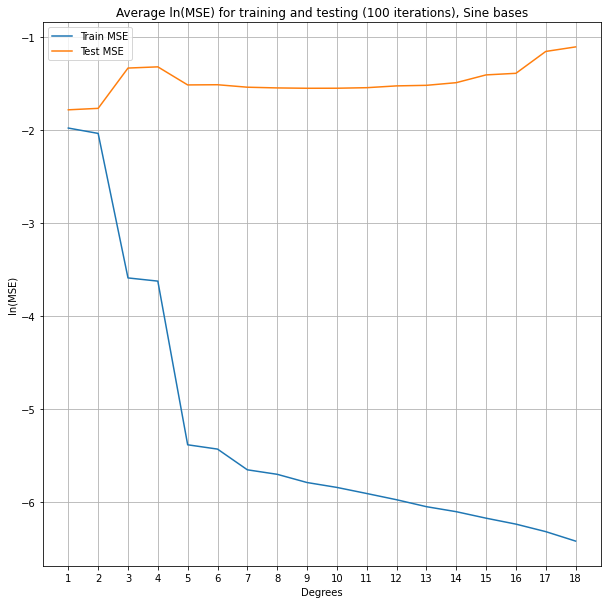

In [1801]:
avgs_ln_train, avgs_ln_test = train_and_test_sine(100)
degrees = np.arange(1,19,1)
plt.figure(figsize=[10,10])
plt.plot(degrees,avgs_ln_train,label="Train MSE")
plt.plot(degrees,avgs_ln_test,label="Test MSE")
plt.ylabel("ln(MSE)")
plt.xlabel("Degrees")
plt.xticks(np.arange(1,19,1))
plt.title("Average ln(MSE) for training and testing (100 iterations), Sine bases")
plt.grid()
plt.legend()
plt.show()

## 1.2. Filtered Boston Housing and Kernels (10 marks)

In [1824]:
url = "http://www0.cs.ucl.ac.uk/staff/M.Herbster/boston-filter/Boston-filtered.csv"
dataset = pd.read_csv(url)

In [1865]:
def train_test_split(dataset):
    train_ind = np.random.choice(range(len(dataset)),337,replace=False)
    test_ind = np.asarray(list(set(range(len(dataset)))-set(train_ind)))
    train = dataset.loc[train_ind]
    train_x = train.loc[:,dataset_x.columns!="MEDV"]
    train_y = train[["MEDV"]]
    test = dataset.loc[test_ind]
    test_x = test.loc[:,dataset_x.columns!="MEDV"]
    test_y = test[["MEDV"]]   
    return train_x,train_y,test_x,test_y

### 1.2. a) Naive Regression

In [1963]:
def run_training_and_testing_part_a(dataset,iters):
    train_mses = []
    test_mses = []
    for iter in range(iters):
        train_x,train_y,test_x,test_y = train_test_split(dataset)
        train_x = np.asarray(train_x)
        train_y = np.asarray(train_y)

        test_x = np.asarray(test_x)
        test_y = np.asarray(test_y)
        train_vec = np.ones(train_x.shape[0]).reshape(-1,1)
        test_vec = np.ones(test_x.shape[0]).reshape(-1,1)

        naive_reg = LinearRegressionMSE()
        naive_reg.fit(train_vec,train_y)
        train_mses.append(naive_reg.mse(naive_reg.predict(train_vec),train_y))
        test_mses.append(naive_reg.mse(naive_reg.predict(test_vec),test_y))

        coef = naive_reg.coef_[0]
        train_mean = train_y.mean()
        test_mean = test_y.mean()

    print(f"Naive regression predicts the mean of the median value of the owner-occupied homes training dataset: regression coefficient - {coef}, training mean median value - {train_mean}, testing mean median value - {test_mean} for the last iteration \n")
    train_mses = np.asarray(train_mses)
    test_mses = np.asarray(test_mses)
    return train_mses.mean(),test_mses.mean()

In [1964]:
train_mse,test_mse = run_training_and_testing_part_a(dataset,20)
print(f"Average MSE for 20 iterations: training - {train_mse}, testing - {test_mse}")

Naive regression predicts the mean of the median value of the owner-occupied homes training dataset: regression coefficient - [22.38278932], training mean median value - 22.382789317507417, testing mean median value - 22.831952662721893 for the last iteration 

Average MSE for 20 iterations: training - 83.9694620274899, testing - 85.51975488821253


### c) Single attributes

In [2044]:
def run_training_and_testing_part_c(dataset,iters):
    attribute_train_mse = {}
    attribute_test_mse = {}
    for iter in range(iters):
        train_x,train_y,test_x,test_y = train_test_split(dataset)
        train_x = np.asarray(train_x)
        train_y = np.asarray(train_y)
        test_x = np.asarray(test_x)
        test_y = np.asarray(test_y)

        for attr in range(train_x.shape[1]):
            lin_reg = LinearRegressionMSE()
            attr_vector = train_x[:,attr].reshape(-1,1)
            attr_vector_test = test_x[:,attr].reshape(-1,1)
            lin_reg.fit(change_basis_vector(attr_vector,2),train_y)

            if dataset.columns[attr] not in attribute_train_mse:
                attribute_train_mse[dataset.columns[attr]] = lin_reg.mse(lin_reg.predict(change_basis_vector(attr_vector,2)),train_y)
            else:
                attribute_train_mse[dataset.columns[attr]] += lin_reg.mse(lin_reg.predict(change_basis_vector(attr_vector,2)),train_y)

            if dataset.columns[attr] not in attribute_test_mse:
                attribute_test_mse[dataset.columns[attr]] = lin_reg.mse(lin_reg.predict(change_basis_vector(attr_vector_test,2)),test_y)
            else:
                attribute_test_mse[dataset.columns[attr]] += lin_reg.mse(lin_reg.predict(change_basis_vector(attr_vector_test,2)),test_y)
              
    for attr in attribute_train_mse:
        attribute_train_mse[attr] /= iters
        attribute_test_mse[attr] /= iters

    return attribute_train_mse,attribute_test_mse

In [2045]:
attribute_train_mse,attribute_test_mse = run_training_and_testing_part_c(dataset,20)
attribute_train_mse,attribute_test_mse

({'CRIM': 72.96132410802163,
  ' ZN ': 74.25454415559021,
  'INDUS ': 65.5675661547672,
  'CHAS': 82.94215700838986,
  'NOX': 70.14003638768823,
  'RM': 45.03006837603214,
  'AGE': 73.35442219249653,
  'DIS': 80.26969237886786,
  'RAD': 73.20457678137629,
  'TAX': 67.02581815304903,
  'PTRATIO': 63.191474797398186,
  'LSTAT': 38.85050123936566},
 {'CRIM': 69.8991917194856,
  ' ZN ': 72.2229367729323,
  'INDUS ': 63.161278498422675,
  'CHAS': 80.117238370341,
  'NOX': 67.06242437781864,
  'RM': 41.09768466146942,
  'AGE': 70.91465973024776,
  'DIS': 77.29350909974296,
  'RAD': 70.3847313054474,
  'TAX': 63.94422384335695,
  'PTRATIO': 62.023118462489876,
  'LSTAT': 38.111909594191516})

### d) All attributes

In [2053]:
def run_training_and_testing_part_d(dataset,iters):
    train_mse = []
    test_mse = []
    for iter in range(iters):
        train_x,train_y,test_x,test_y = train_test_split(dataset)
        train_x = np.asarray(train_x)
        train_y = np.asarray(train_y)
        test_x = np.asarray(test_x)
        test_y = np.asarray(test_y)

        train_x = np.append(train_x,np.ones(train_x.shape[0]).reshape(-1,1),axis=1)
        test_x = np.append(test_x,np.ones(test_x.shape[0]).reshape(-1,1),axis=1)
        lin_reg = LinearRegressionMSE()
        lin_reg.fit(train_x,train_y)
        train_mse.append(lin_reg.mse(lin_reg.predict(train_x),train_y))
        test_mse.append(lin_reg.mse(lin_reg.predict(test_x),test_y))

    train_mse = np.asarray(train_mse)
    test_mse = np.asarray(test_mse)
    return train_mse.mean(),test_mse.mean()

In [2058]:
train_mse,test_mse = run_training_and_testing_part_d(dataset,20)
print(f"Training and testing MSEs for all attributes (after 20 iterations): training - {train_mse}, testing - {test_mse}")

Training and testing MSEs for all attributes (after 20 iterations): training - 21.864763654518633, testing - 24.639039874022142


## 1.3. Kernelised Ridge Regression

In [2073]:
train_x,train_y,test_x,test_y = train_test_split(dataset)
train_x = np.asarray(train_x)
train_x

array([[1.71200e-01, 0.00000e+00, 8.56000e+00, ..., 3.84000e+02,
        2.09000e+01, 1.86600e+01],
       [6.90500e-02, 0.00000e+00, 2.18000e+00, ..., 2.22000e+02,
        1.87000e+01, 5.33000e+00],
       [2.69380e-01, 0.00000e+00, 9.90000e+00, ..., 3.04000e+02,
        1.84000e+01, 7.90000e+00],
       ...,
       [8.82600e-02, 0.00000e+00, 1.08100e+01, ..., 3.05000e+02,
        1.92000e+01, 6.72000e+00],
       [7.36711e+00, 0.00000e+00, 1.81000e+01, ..., 6.66000e+02,
        2.02000e+01, 2.15200e+01],
       [2.33099e+00, 0.00000e+00, 1.95800e+01, ..., 4.03000e+02,
        1.47000e+01, 2.83200e+01]])

In [2109]:
### Stas's part